<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       7043 non-null   object        
 1   Order Date     0 non-null      datetime64[ns]
 2   Ship Date      0 non-null      datetime64[ns]
 3   Ship Mode      7043 non-null   object        
 4   Customer ID    7043 non-null   object        
 5   Customer Name  7043 non-null   object        
 6   Segment        7043 non-null   object        
 7   Country        7043 non-null   object        
 8   City           7043 non-null   object        
 9   State          7043 non-null   object        
 10  Postal Code    7043 non-null   object        
 11  Region         7043 non-null   object        
 12  Product ID     7043 non-null   object        
 13  Category       7043 non-null   object        
 14  Sub-Category   7043 non-null   object        
 15  Product Name   7043 n

C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_6324\1822152398.py:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_split.corr(method="pearson")



Pearson Correlation Matrix:
           Sales  Quantity  Discount    Profit
Sales       NaN       NaN       NaN       NaN
Quantity    NaN       NaN       NaN       NaN
Discount    NaN       NaN  1.000000  0.651174
Profit      NaN       NaN  0.651174  1.000000


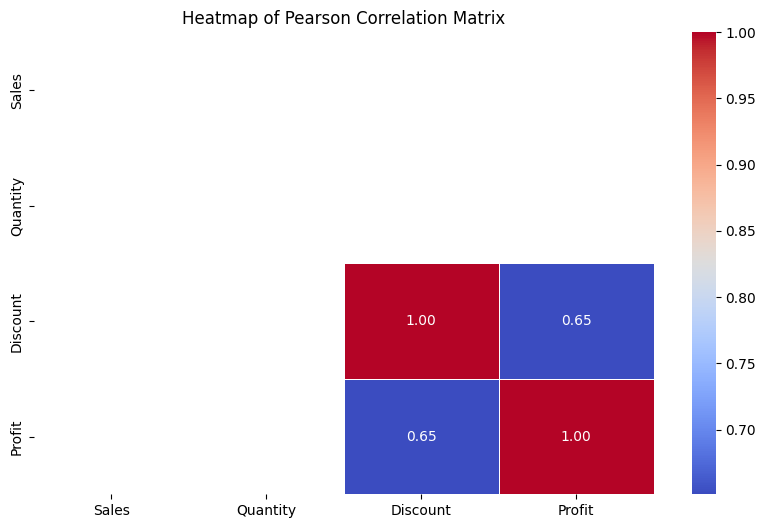

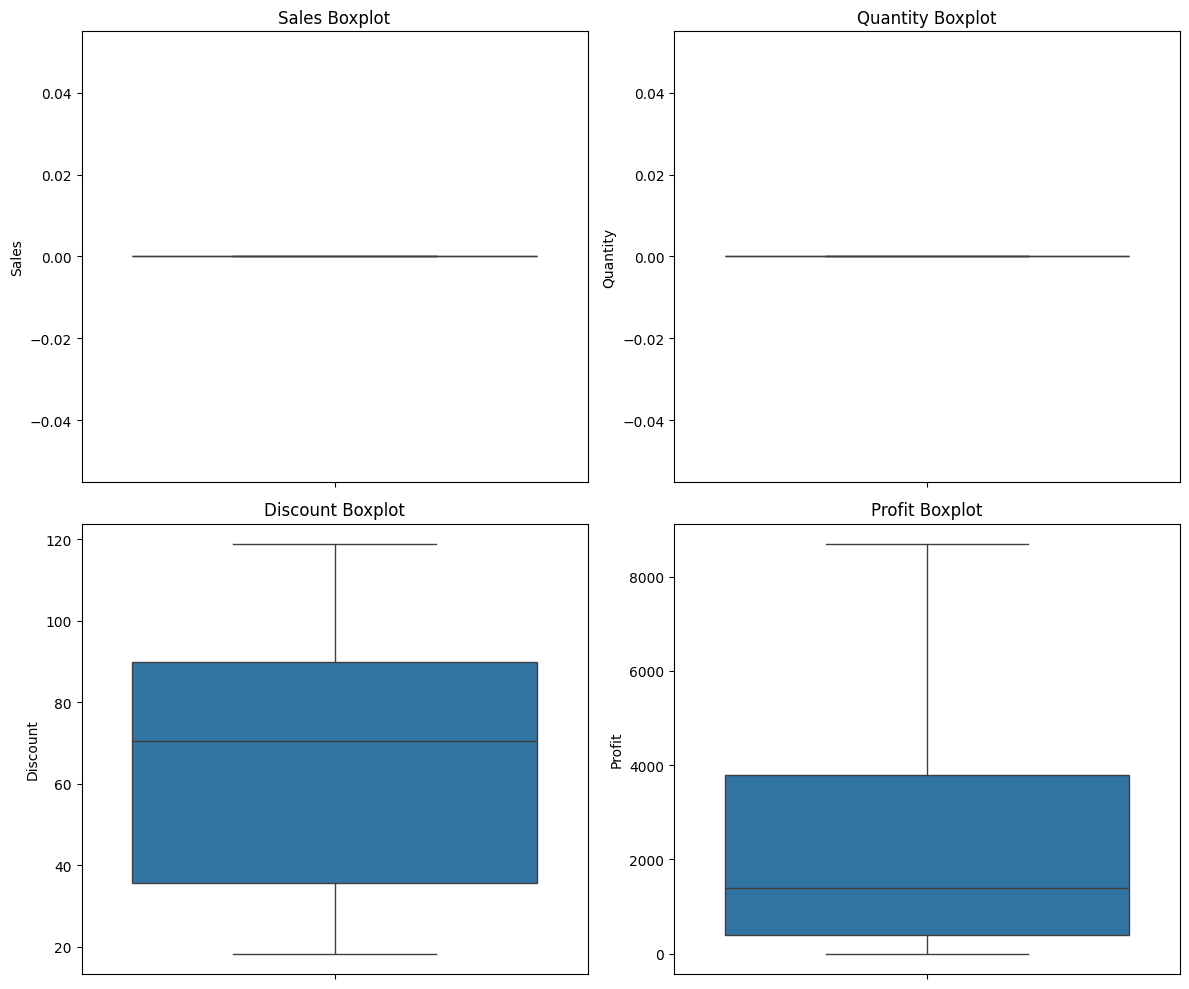

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:\\Users\\Infinix X2\\Documents\\SEMESTER 8\\Data Science\\customer-churn.xlsx"
xls = pd.ExcelFile(file_path)

# Load data from the sheet "in"
df = pd.read_excel(file_path, sheet_name="in", engine="openpyxl")

# Split the first column into multiple columns using ',' as delimiter
df_split = df.iloc[:, 0].str.split(',', expand=True)

# Define correct column names based on Superstore dataset structure
column_names = [
    "Order ID", "Order Date", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Segment",
    "Country", "City", "State", "Postal Code", "Region", "Product ID", "Category", "Sub-Category",
    "Product Name", "Sales", "Quantity", "Discount", "Profit"
]

df_split = df_split.iloc[:, :20]
df_split.columns = column_names

# Convert numeric columns to appropriate types and fill NaN values with 0
df_split["Sales"] = pd.to_numeric(df_split["Sales"], errors="coerce").fillna(0)
df_split["Quantity"] = pd.to_numeric(df_split["Quantity"], errors="coerce").fillna(0)
df_split["Discount"] = pd.to_numeric(df_split["Discount"], errors="coerce").fillna(0)
df_split["Profit"] = pd.to_numeric(df_split["Profit"], errors="coerce").fillna(0)

# Convert date columns to datetime format
df_split["Order Date"] = pd.to_datetime(df_split["Order Date"], errors="coerce")
df_split["Ship Date"] = pd.to_datetime(df_split["Ship Date"], errors="coerce")

# Display basic dataset info
df_split.info()
print(df_split.describe())

# Display first 5 rows
print("\nFirst 5 rows of dataset:")
print(df_split.head())

# Function to detect outliers using Tukey's Fence
def tukeys_fence_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][[column]]

# Detect outliers for key numerical columns
outliers_sales = tukeys_fence_outliers(df_split, "Sales")
outliers_quantity = tukeys_fence_outliers(df_split, "Quantity")
outliers_discount = tukeys_fence_outliers(df_split, "Discount")
outliers_profit = tukeys_fence_outliers(df_split, "Profit")

# Print number of outliers
print("Outliers in Sales:", len(outliers_sales))
print("Outliers in Quantity:", len(outliers_quantity))
print("Outliers in Discount:", len(outliers_discount))
print("Outliers in Profit:", len(outliers_profit))

# Compute Pearson correlation matrix
correlation_matrix = df_split.corr(method="pearson")
print("\nPearson Correlation Matrix:\n", correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Pearson Correlation Matrix")
plt.show()

# Boxplots to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df_split["Sales"], ax=axes[0, 0]).set_title("Sales Boxplot")
sns.boxplot(y=df_split["Quantity"], ax=axes[0, 1]).set_title("Quantity Boxplot")
sns.boxplot(y=df_split["Discount"], ax=axes[1, 0]).set_title("Discount Boxplot")
sns.boxplot(y=df_split["Profit"], ax=axes[1, 1]).set_title("Profit Boxplot")
plt.tight_layout()
plt.show()


In [80]:
# Penanganan Missing Values:
# Mengisi nilai yang hilang pada TotalCharges dengan median
if "TotalCharges" in df.columns:
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Mengecek Missing Values setelah penanganan
missing_values_after = df.isnull().sum()
print("\nMissing Values setelah penanganan:")
print(missing_values_after[missing_values_after > 0])


Missing Values setelah penanganan:
Series([], dtype: int64)


KeyError: 'tenure'

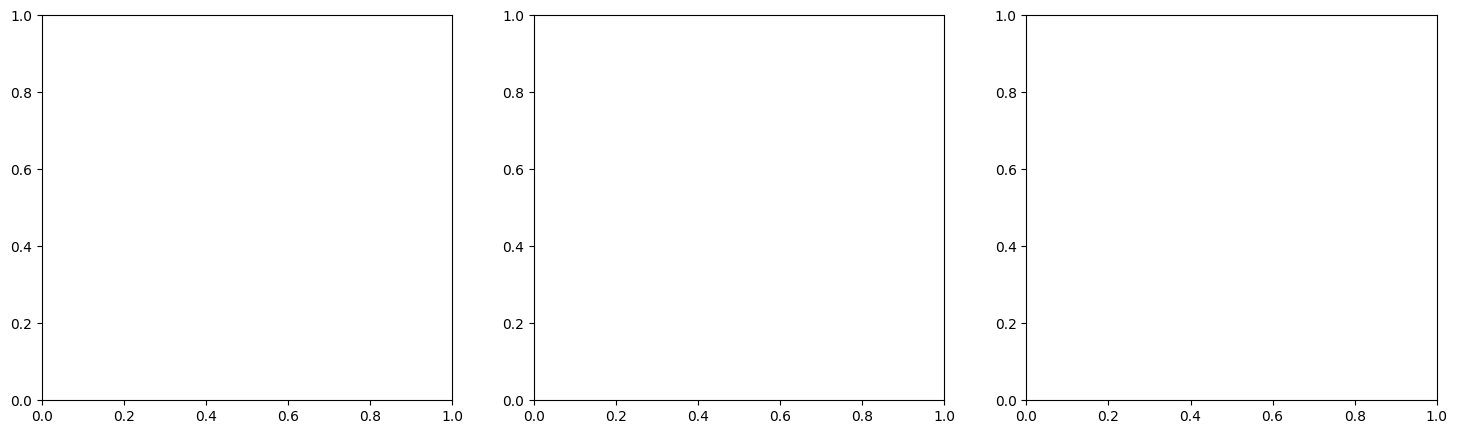

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Distribusi Data untuk Kolom Numerik
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df_split[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

# Analisis Korelasi
correlation_matrix = df_split[numerical_columns].corr(method="pearson")
print("\nKorelasi Pearson:")
print(correlation_matrix)

# Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# Visualisasi Data Kategorikal
categorical_columns = ["gender", "Partner", "Dependents", "PhoneService", "InternetService", "Contract", "Churn"]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df_split[col], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Countplot {col}')
    axes[i//4, i%4].set_xticklabels(axes[i//4, i%4].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Membaca file Excel
file_path = r"C:\Users\Infinix X2\Documents\SEMESTER 8\Data Science\customer-churn.xlsx"
df = pd.read_excel(file_path)

# Memisahkan kolom jika diperlukan
if df.shape[1] == 1:
    df = df.iloc[:, 0].str.split(',', expand=True)
    df.columns = ["customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]

# Menampilkan data
print("=" * 80)
print("DATA CUSTOMER CHURN")
print("=" * 80)

# Menampilkan beberapa baris pertama
print("\n5 Baris Pertama:")
print(df.head())


In [ ]:
# Menampilkan informasi dasar
print("\nInformasi Dataset:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")


In [ ]:
# Menampilkan nama kolom
print("\nNama Kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


In [ ]:
# Menampilkan ringkasan data
print("\nRingkasan Data:")
print(df.info())


In [ ]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


In [ ]:

# Menampilkan keseluruhan data (opsional, jika dataset tidak terlalu besar)
print("\nKeseluruhan Data:")
print(df)


In [ ]:

# Menampilkan jumlah nilai unik untuk kolom kategorikal
print("\nNilai Unik pada Kolom Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} nilai unik")
    print(df[col].value_counts())
    print("-" * 40)


In [ ]:

# Mengubah kolom numerik menjadi tipe data numerik (menangani error jika ada string kosong)
if "tenure" in df.columns:
    df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
if "MonthlyCharges" in df.columns:
    df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif setelah konversi tipe data:")
print(df.describe())


In [ ]:

# Mengecek Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


In [ ]:

# Penanganan Missing Values:
# Mengisi nilai yang hilang pada TotalCharges dengan median
if "TotalCharges" in df.columns:
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Mendeteksi outlier dengan Tukey’s Fence
def detect_outliers_tukey(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Mencari outlier pada kolom numerik
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
outliers = {col: detect_outliers_tukey(df, col) for col in numerical_columns}
for col, outlier_data in outliers.items():
    print(f"Jumlah outlier pada {col}: {len(outlier_data)}")


In [ ]:
# Menghitung korelasi Pearson
correlation_matrix = df.corr(method="pearson")
print("\nKorelasi Pearson:")
print(correlation_matrix)

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()